# Segmentación de Especies con Cluster Analysis

In [130]:
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install kneed

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [134]:
import pandas as pd
from kneed import KneeLocator
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no o conocen, pueden leer sobre esta en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris-dataset.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

Agrupen las flores por la forma de su sépalo:

Empiecen por crear 2 "clusters".  Luego estandaricen los datos e intenten de nuevo.  ¿Qué diferencias hay, si es que lo hay?

Utilicen el método del "codo" para determinar cuantos "clusters" hay. 

Basado en la gráfica del "codo" realicen varias gráficas con el número adecuado de clusters que Uds creen mejor se ajusten a los datos.

Comparen sus soluciones con los datos reales, archivo: *iris-with-answers.csv*
**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las misma preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


# Seccion 1

In [17]:
df = pd.read_csv("iris-dataset.csv")
answers_df = pd.read_csv("iris-with-answers.csv")
iris = df.copy()

In [18]:
k_means = KMeans(2)

In [19]:
clusters_non_standard = k_means.fit_predict(df)
clusters_non_standard

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
df_clusters = df.copy()
df_clusters["cluster"] = clusters_non_standard 
df_clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [55]:
zero_g = df_clusters[df_clusters["cluster"] == 0]
one_g = df_clusters[df_clusters["cluster"] == 1]

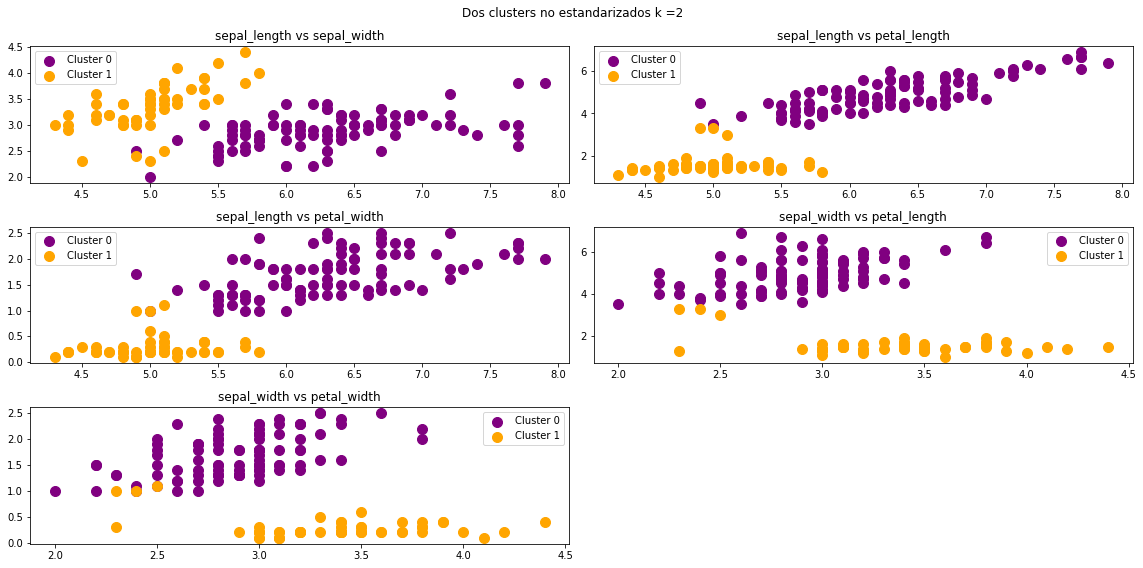

In [57]:
#Visualising the clusters
fig = plt.figure(figsize=(16, 8))
tuples = [["sepal_length", "sepal_width"], ["sepal_length", "petal_length"],["sepal_length", "petal_width"], ["sepal_width", "petal_length"],["sepal_width", "petal_width"]]
for i, _tuple in enumerate(tuples):
    ax = fig.add_subplot(3, 2, i+1)
    plt.title(_tuple[0] + " vs " + _tuple[1])
    plt.scatter(zero_g[_tuple[0]], zero_g[_tuple[1]], s = 100, c = 'purple', label = 'Cluster 0')
    plt.scatter(one_g[_tuple[0]], one_g[_tuple[1]], s = 100, c = 'orange', label = 'Cluster 1')
    plt.legend()

plt.suptitle("Dos clusters no estandarizados k =2")
fig.tight_layout()
plt.show()

# Cluster estandarizado

In [43]:
#Asignamos un scaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [44]:
cols_standarized = escalador.transform(df)

In [46]:
# Create the standarized data frame
standarized_dataframe = pd.DataFrame(cols_standarized, columns = df.columns)
standarized_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [48]:
#Create them standarized
clusters_standard = k_means.fit_predict(standarized_dataframe)
df_clusters_standarized = df.copy()
df_clusters_standarized["cluster"] = clusters_standard
df_clusters_standarized["cluster"].unique()

array([0, 1], dtype=int32)

In [50]:
zero_g = df_clusters_standarized[df_clusters_standarized["cluster"] == 0]
one_g = df_clusters_standarized[df_clusters_standarized["cluster"] == 1]

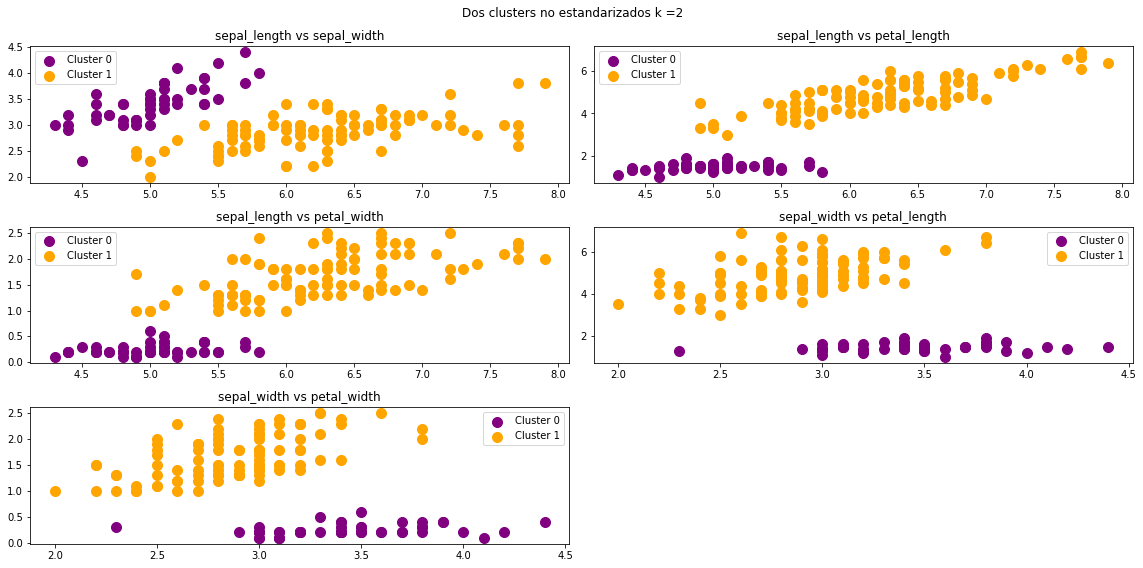

In [54]:
fig = plt.figure(figsize=(16, 8))
tuples = [["sepal_length", "sepal_width"], ["sepal_length", "petal_length"],["sepal_length", "petal_width"], ["sepal_width", "petal_length"],["sepal_width", "petal_width"]]
for i, _tuple in enumerate(tuples):
    ax = fig.add_subplot(3, 2, i+1)
    plt.title(_tuple[0] + " vs " + _tuple[1])
    plt.scatter(zero_g[_tuple[0]], zero_g[_tuple[1]], s = 100, c = 'purple', label = 'Cluster 0')
    plt.scatter(one_g[_tuple[0]], one_g[_tuple[1]], s = 100, c = 'orange', label = 'Cluster 1')
    plt.legend()

plt.suptitle("Dos clusters no estandarizados k =2")
fig.tight_layout()
plt.show()

### Observaciones
En cuanto a forma notamos las graficas muy parecidas pero ya notando a detalle notamos dos cosas en especifico.

- Primero notamos que los clusters se invertieron ahora los del cluster 0 en su mayoria son del 1
- Segundo notamos que en todas las graficas hay tres puntos que no cambiaron se puede notar mas en speal_width vs petal lenth los de abajo del cluster 0 en lo no estandarizado notamos que pertenecian al uno y en estas graficas tampoco cambiaron

# Cluster a base de grafica de codo

Generaremos una grafica de codo para saber el numero de k means idoneo

In [177]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(standarized_dataframe)
    distortions.append(kmeanModel.inertia_)

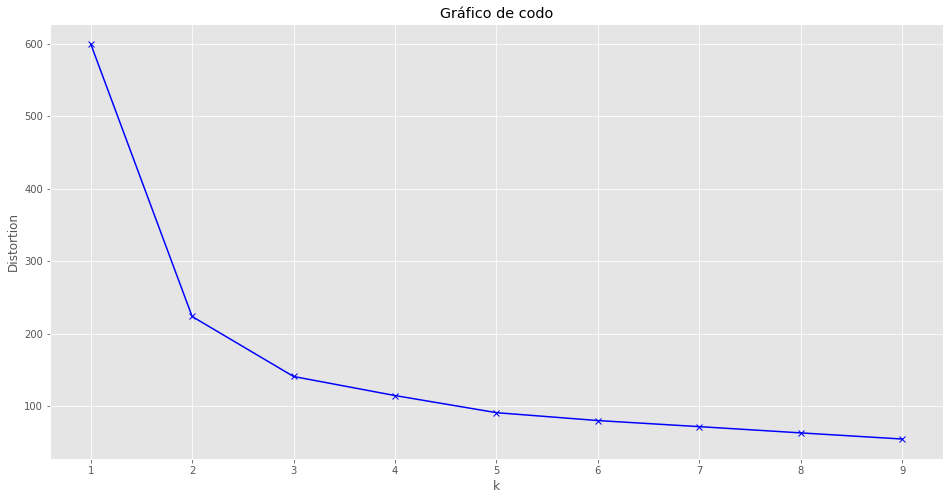

In [178]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Gráfico de codo')
plt.show()

**Resultados**<br>
Los resultados muestra que 5 a partir de k =5 la disminucion ya empieza a parecer mas constante el numero de errores mientras que en k =4 aun se nota una diagonal.

## Modelo Sepal

In [64]:
ideal_k = KNeighborsClassifier(n_neighbors=5)

In [65]:
# Lo convertimos a category para un mejor manejo
answers_df["species"] = answers_df["species"].astype("category")

In [72]:
answers_df["species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [66]:
#creamos nuestro scalador
escalator_model = StandardScaler()
# Botamos species
adf_s = answers_df.drop('species', axis=1)
escalator_model.fit(adf_s)

StandardScaler()

In [69]:
columns_standarized_answers = escalator_model.transform(adf_s)
# Creamos nuestro nuevo dataset standarizado
df_answer_standarized = pd.DataFrame(columns_standarized_answers, columns=adf_s.columns)
df_answer_standarized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [70]:
df_answer_standarized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**Train and test split 0.7 train and 0.3 test**

In [73]:
x_train, x_test, y_train, y_test = train_test_split(df_answer_standarized.iloc[:,[0,1]], answers_df['species'],
                                                    test_size=0.30)

Fit k means

In [75]:
ideal_k.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
pred = ideal_k.predict(x_test)

In [89]:
cm = confusion_matrix(y_test,pred)
accuracy=accuracy_score(y_test,pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8222222222222222


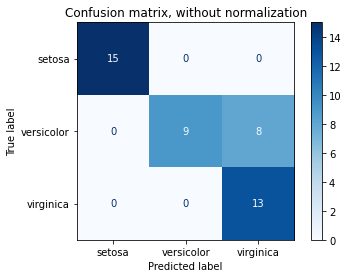

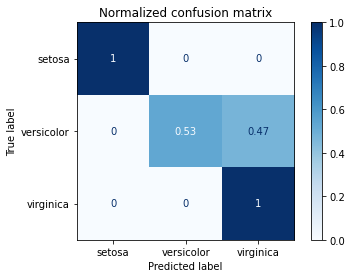

In [83]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ideal_k, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

**Resultados**<br>
Notamos que el modelo es bastante bieno para clasificar en general la especie setosa pero a pesar que la especia virginica saco un 100% de accuracy notamos que hubieron varios falsos positivos con versicolor y esa precisamente solo tuvo un 53% de predicciones correctas.
<br>
El accuracy obtenido en el modelo es  del 82% bastante bueno<br>
Esperabamos errores para este cluster debido a que teniamos 5 y notamos que debio de ser k =3

## Modelo Petalo

**Train and test split 0.7 train and 0.3 test**

In [179]:
x_train, x_test, y_train, y_test = train_test_split(df_answer_standarized.iloc[:,[2,3]], answers_df['species'],
                                                    test_size=0.30)

In [180]:
correct_k = KNeighborsClassifier(n_neighbors=5)

In [181]:
correct_k.fit(x_train, y_train)

KNeighborsClassifier()

In [182]:
pred = correct_k.predict(x_test)

In [183]:
cm = confusion_matrix(y_test,pred)
accuracy=accuracy_score(y_test,pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9777777777777777


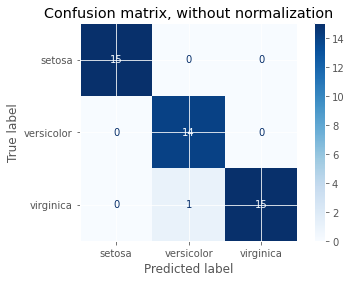

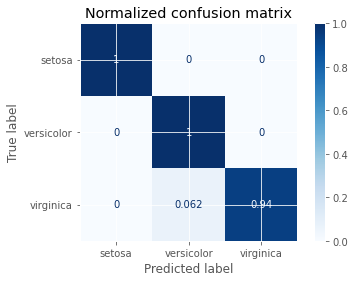

In [184]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(correct_k, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

**Observaciones**<br>
Al hacer el modelo para petalo y usar el numero correcto de clusters notamos una gran mejora principalmente en lo que es la calsificación de versicolor paso de un 53% de accuracy a tener un 94% como notamos en la matriz de confusion normalizada.
<br>
Ademas tambien notamos que el accuracy en general mejoro a un 97.77 % 

# Kneed Sepal

In [132]:
#For the knee
ekneed = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    #Only sepals
    kmeans.fit(df_answer_standarized.iloc[:,[0,1]])
    ekneed.append(kmeans.inertia_)

<Figure size 1152x576 with 0 Axes>

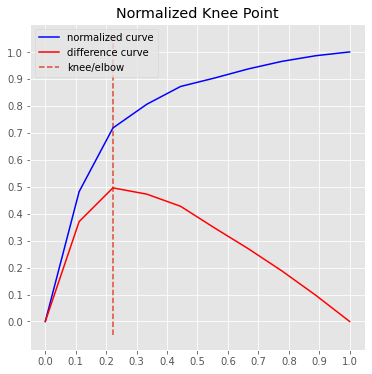

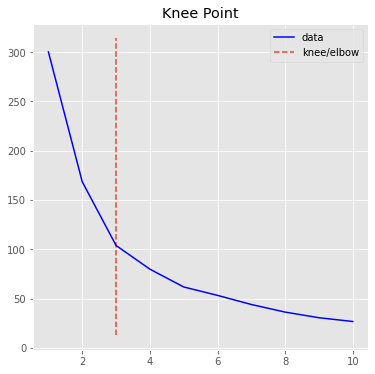

In [140]:
#Knee locator
knee_locator = KneeLocator(range(1,11), ekneed, curve="convex", direction="decreasing")
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 8))
knee_locator.plot_knee_normalized()
knee_locator.plot_knee()

La libreria KNee nos indica que deberian de ser 3 clusters realmente lo cual tiene razon nos ayuda a saber cual numero es el corrector de usar.

# Sepals k =3

**Train test split**<br>Solo sepalos

In [171]:
x_train, x_test, y_train, y_test = train_test_split(df_answer_standarized.iloc[:,[0,1]], answers_df['species'],
                                                    test_size=0.30)

In [172]:
k_knee_sepals = KNeighborsClassifier(n_neighbors=3)

In [173]:
k_knee_sepals.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
sepal_pred_k_3 = k_knee_sepals.predict(x_test)

In [175]:
cm = confusion_matrix(y_test,sepal_pred_k_3)
accuracy=accuracy_score(y_test,sepal_pred_k_3)
print("Accuracy: ",accuracy)

Accuracy:  0.6666666666666666


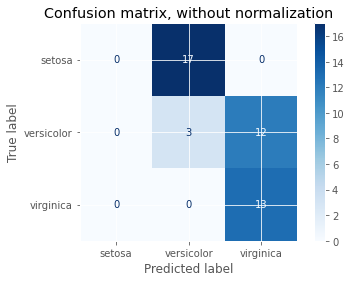

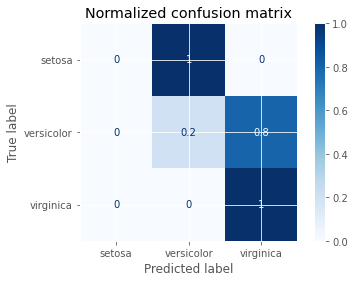

In [190]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(k_knee_sepals, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

#### Resultados
Lo primero que notamos a comparacion del otro es que nuestro accuracy bajo algo que no esperabamos realmente.
Porque se podria deber esto? podria ser debido a falta de estratificacion de los datos y falta de datos para que se sepan producir bien.<br>
En este modelo la clasificacion tanto de setosa como versicolor empeoro aun mas

# Kneed Petal

In [185]:
#For the knee
ekneed = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    #Only sepals
    kmeans.fit(df_answer_standarized.iloc[:,[2,3]])
    ekneed.append(kmeans.inertia_)

<Figure size 1152x576 with 0 Axes>

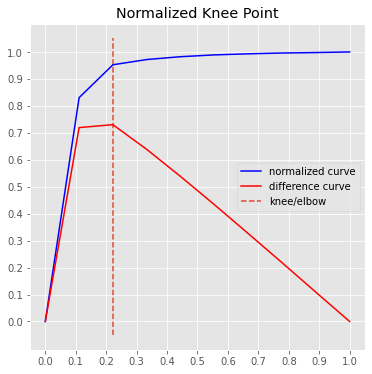

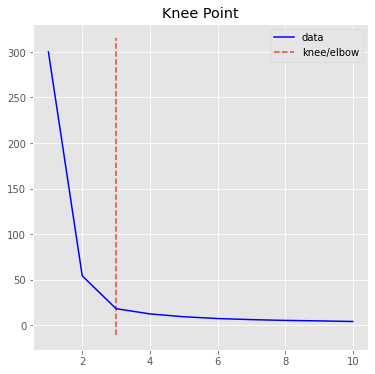

In [186]:
#Knee locator
knee_locator = KneeLocator(range(1,11), ekneed, curve="convex", direction="decreasing")
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 8))
knee_locator.plot_knee_normalized()
knee_locator.plot_knee()

Al igual que el pasado notamos que nos indica que tres clusters es la cantidad necesaria de hecho aca se nota que la disminucion de errores baja mas drasticamente por cantidad de klusters vs el sepalo

# Petals k =3

**Train test split**<br>Solo petalos

In [187]:
x_train, x_test, y_train, y_test = train_test_split(df_answer_standarized.iloc[:,[2,3]], answers_df['species'],
                                                    test_size=0.30)

In [188]:
k_knee_petals = KNeighborsClassifier(n_neighbors=3)
k_knee_petals.fit(x_train, y_train)
petal_pred_k_3 = k_knee_petals.predict(x_test)

In [189]:
cm = confusion_matrix(y_test,petal_pred_k_3)
accuracy=accuracy_score(y_test,petal_pred_k_3)
print("Accuracy: ",accuracy)

Accuracy:  0.9777777777777777


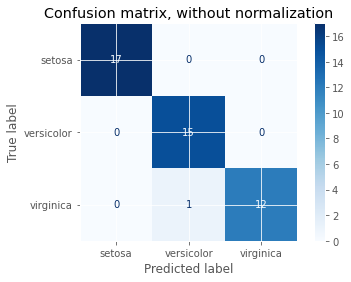

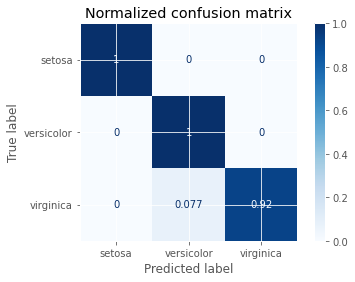

In [191]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(k_knee_petals, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

#### Resultados
En este paso algo cursioso ambos tuvieron el mismo accuracy score pero segun la matriz de confusión la clasificacion de la especia virginica empeoro un poco pero esto se debe a que hay una menor cantidad que fue solo un dato el erroneo.<br>
Igual que con k =5 para los petalos solo una especie de versicolor que realmente se predijo como versicolor fue el error solo que habian menos virginicas aca no se sabria decir si un modelo es mejor que el otro.

### Conclusiones

- El dataset de petalos despues de k =3 hasta k =5 tiene una ccuraxy practicamente iguales y esto es debido a su confiabilidad dentro de sus variables.
- La libreria Kneedly es útil para saber cuantos clusters deberiamos de tener pero puede fallar.
- Las graficas de codo nos ayudan a saber a partir de donde hay menos errores.
- La estra
1.   El dataset de los pétalos es más preciso con 3 clusters que el de sépalo, debido a que las variables contienen un porcentaje más alto de confiabilidad.
2.   El Algoritmo Kneedle provee la cantidad de clusters, siendo 3, para la dataset de los sépalos, causando un menor porcentaje de precisión que el "codo" manual.
3.   Los codos son esenciales para determinar los clusters necesarios para un determinado dataset, esenciales para comparar resultados en diferentes modelos.

